In [1]:
!git clone https://github.com/sryza/aas.git

Cloning into 'aas'...
remote: Enumerating objects: 3574, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 3574 (delta 17), reused 36 (delta 12), pack-reused 3529
Receiving objects: 100% (3574/3574), 70.95 MiB | 32.13 MiB/s, done.
Resolving deltas: 100% (941/941), done.


In [2]:
!cp /content/aas/ch09-risk/data/stocks.zip .
!cp /content/aas/ch09-risk/data/factors.zip .

In [3]:
!unzip -q stocks.zip
!unzip -q factors.zip

In [4]:
!pip install pyspark --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [5]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName('Monte Carlo').getOrCreate()

In [7]:
stocks = spark.read.csv('./stocks/*.csv', header='True', inferSchema='True')

stocks.show(5)

+---------+-------+-------+-------+-------+------+
|     Date|   Open|   High|    Low|  Close|Volume|
+---------+-------+-------+-------+-------+------+
|31-Dec-13|1884.00|1900.00|1880.00| 1900.0|   546|
|30-Dec-13|1889.00|1900.00|1880.00| 1900.0|  1656|
|27-Dec-13|1880.00|1909.00|1880.00|1891.12|  1939|
|24-Dec-13|1875.00|1885.00|1875.00| 1884.0|  2351|
|23-Dec-13|1875.00|1875.00|1865.00| 1875.0|  2819|
+---------+-------+-------+-------+-------+------+
only showing top 5 rows



In [8]:
stocks.count()

5858754

In [9]:
from pyspark.sql import functions as f

In [10]:
stocks = stocks.withColumn('Symbol', f.input_file_name())

stocks.show(5)

+---------+-------+-------+-------+-------+------+--------------------+
|     Date|   Open|   High|    Low|  Close|Volume|              Symbol|
+---------+-------+-------+-------+-------+------+--------------------+
|31-Dec-13|1884.00|1900.00|1880.00| 1900.0|   546|file:///content/s...|
|30-Dec-13|1889.00|1900.00|1880.00| 1900.0|  1656|file:///content/s...|
|27-Dec-13|1880.00|1909.00|1880.00|1891.12|  1939|file:///content/s...|
|24-Dec-13|1875.00|1885.00|1875.00| 1884.0|  2351|file:///content/s...|
|23-Dec-13|1875.00|1875.00|1865.00| 1875.0|  2819|file:///content/s...|
+---------+-------+-------+-------+-------+------+--------------------+
only showing top 5 rows



In [11]:
stocks = stocks.withColumn('Symbol', f.element_at(f.split('Symbol', '/'), -1))

stocks.show(5)

+---------+-------+-------+-------+-------+------+--------+
|     Date|   Open|   High|    Low|  Close|Volume|  Symbol|
+---------+-------+-------+-------+-------+------+--------+
|31-Dec-13|1884.00|1900.00|1880.00| 1900.0|   546|CLDN.csv|
|30-Dec-13|1889.00|1900.00|1880.00| 1900.0|  1656|CLDN.csv|
|27-Dec-13|1880.00|1909.00|1880.00|1891.12|  1939|CLDN.csv|
|24-Dec-13|1875.00|1885.00|1875.00| 1884.0|  2351|CLDN.csv|
|23-Dec-13|1875.00|1875.00|1865.00| 1875.0|  2819|CLDN.csv|
+---------+-------+-------+-------+-------+------+--------+
only showing top 5 rows



In [12]:
stocks = stocks.withColumn('Symbol', f.element_at(f.split('Symbol', '\.'), 1))

stocks.show(5)

+---------+-------+-------+-------+-------+------+------+
|     Date|   Open|   High|    Low|  Close|Volume|Symbol|
+---------+-------+-------+-------+-------+------+------+
|31-Dec-13|1884.00|1900.00|1880.00| 1900.0|   546|  CLDN|
|30-Dec-13|1889.00|1900.00|1880.00| 1900.0|  1656|  CLDN|
|27-Dec-13|1880.00|1909.00|1880.00|1891.12|  1939|  CLDN|
|24-Dec-13|1875.00|1885.00|1875.00| 1884.0|  2351|  CLDN|
|23-Dec-13|1875.00|1875.00|1865.00| 1875.0|  2819|  CLDN|
+---------+-------+-------+-------+-------+------+------+
only showing top 5 rows



In [13]:
factors = spark.read.csv('./factors/*.csv', header='True', inferSchema='True')

factors.show(5)

+---------+------+------+------+------+-------+
|     Date|  Open|  High|   Low| Close| Volume|
+---------+------+------+------+------+-------+
|31-Dec-13|102.29|102.55|101.17|101.86|7219195|
|30-Dec-13|102.15|102.58|102.08|102.51|4491711|
|27-Dec-13|102.07|102.31|101.69|101.81|4755262|
|26-Dec-13|102.35|102.36|102.01| 102.1|4645323|
|24-Dec-13|103.23|103.35|102.80|102.83|4897009|
+---------+------+------+------+------+-------+
only showing top 5 rows



In [14]:
factors = factors.withColumn('Symbol', f.input_file_name())

factors.show(5)

+---------+------+------+------+------+-------+--------------------+
|     Date|  Open|  High|   Low| Close| Volume|              Symbol|
+---------+------+------+------+------+-------+--------------------+
|31-Dec-13|102.29|102.55|101.17|101.86|7219195|file:///content/f...|
|30-Dec-13|102.15|102.58|102.08|102.51|4491711|file:///content/f...|
|27-Dec-13|102.07|102.31|101.69|101.81|4755262|file:///content/f...|
|26-Dec-13|102.35|102.36|102.01| 102.1|4645323|file:///content/f...|
|24-Dec-13|103.23|103.35|102.80|102.83|4897009|file:///content/f...|
+---------+------+------+------+------+-------+--------------------+
only showing top 5 rows



In [15]:
factors = factors.withColumn('Symbol', f.element_at(f.split('Symbol', '/'), -1))

factors.show(5)

+---------+------+------+------+------+-------+------------------+
|     Date|  Open|  High|   Low| Close| Volume|            Symbol|
+---------+------+------+------+------+-------+------------------+
|31-Dec-13|102.29|102.55|101.17|101.86|7219195|NASDAQ%253ATLT.csv|
|30-Dec-13|102.15|102.58|102.08|102.51|4491711|NASDAQ%253ATLT.csv|
|27-Dec-13|102.07|102.31|101.69|101.81|4755262|NASDAQ%253ATLT.csv|
|26-Dec-13|102.35|102.36|102.01| 102.1|4645323|NASDAQ%253ATLT.csv|
|24-Dec-13|103.23|103.35|102.80|102.83|4897009|NASDAQ%253ATLT.csv|
+---------+------+------+------+------+-------+------------------+
only showing top 5 rows



In [16]:
factors = factors.withColumn('Symbol', f.element_at(f.split('Symbol', '\.'), 1))

factors.show(5)

+---------+------+------+------+------+-------+--------------+
|     Date|  Open|  High|   Low| Close| Volume|        Symbol|
+---------+------+------+------+------+-------+--------------+
|31-Dec-13|102.29|102.55|101.17|101.86|7219195|NASDAQ%253ATLT|
|30-Dec-13|102.15|102.58|102.08|102.51|4491711|NASDAQ%253ATLT|
|27-Dec-13|102.07|102.31|101.69|101.81|4755262|NASDAQ%253ATLT|
|26-Dec-13|102.35|102.36|102.01| 102.1|4645323|NASDAQ%253ATLT|
|24-Dec-13|103.23|103.35|102.80|102.83|4897009|NASDAQ%253ATLT|
+---------+------+------+------+------+-------+--------------+
only showing top 5 rows



In [17]:
from pyspark.sql import Window

In [18]:
stocks = stocks.withColumn(
    'count',
    f.count('Symbol').over(Window.partitionBy('Symbol'))
).filter(f.col('count') > 260*5 + 10)

stocks.show(5)

+---------+-----+-----+-----+-----+--------+------+-----+
|     Date| Open| High|  Low|Close|  Volume|Symbol|count|
+---------+-----+-----+-----+-----+--------+------+-----+
|31-Dec-13|79.17|80.18|79.14|80.15|55819372|  AAPL| 3520|
|30-Dec-13|79.64|80.01|78.90|79.22|63407722|  AAPL| 3520|
|27-Dec-13|80.55|80.63|79.93|80.01|56471317|  AAPL| 3520|
|26-Dec-13|81.16|81.36|80.48|80.56|51002035|  AAPL| 3520|
|24-Dec-13|81.41|81.70|80.86| 81.1|41888735|  AAPL| 3520|
+---------+-----+-----+-----+-----+--------+------+-----+
only showing top 5 rows



In [19]:
spark.sql('set spark.sql.legacy.timeParserPolicy=LEGACY')

DataFrame[key: string, value: string]

In [20]:
stocks.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- count: long (nullable = false)



In [21]:
stocks = stocks.withColumn(
    'Date',
    f.to_date(f.to_timestamp(f.col('Date'), 'dd-MMM-yy'))
)

stocks.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: string (nullable = true)
 |-- High: string (nullable = true)
 |-- Low: string (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- count: long (nullable = false)



In [22]:
stocks.show(5)

+----------+-----+-----+-----+-----+--------+------+-----+
|      Date| Open| High|  Low|Close|  Volume|Symbol|count|
+----------+-----+-----+-----+-----+--------+------+-----+
|2013-12-31|79.17|80.18|79.14|80.15|55819372|  AAPL| 3520|
|2013-12-30|79.64|80.01|78.90|79.22|63407722|  AAPL| 3520|
|2013-12-27|80.55|80.63|79.93|80.01|56471317|  AAPL| 3520|
|2013-12-26|81.16|81.36|80.48|80.56|51002035|  AAPL| 3520|
|2013-12-24|81.41|81.70|80.86| 81.1|41888735|  AAPL| 3520|
+----------+-----+-----+-----+-----+--------+------+-----+
only showing top 5 rows



In [23]:
from datetime import datetime

In [24]:
stocks = stocks.filter(f.col('Date') >= datetime(2009, 10, 23))
stocks = stocks.filter(f.col('Date') <= datetime(2014, 10, 23))

stocks.show(5)

+----------+-----+-----+-----+-----+--------+------+-----+
|      Date| Open| High|  Low|Close|  Volume|Symbol|count|
+----------+-----+-----+-----+-----+--------+------+-----+
|2013-12-31|79.17|80.18|79.14|80.15|55819372|  AAPL| 3520|
|2013-12-30|79.64|80.01|78.90|79.22|63407722|  AAPL| 3520|
|2013-12-27|80.55|80.63|79.93|80.01|56471317|  AAPL| 3520|
|2013-12-26|81.16|81.36|80.48|80.56|51002035|  AAPL| 3520|
|2013-12-24|81.41|81.70|80.86| 81.1|41888735|  AAPL| 3520|
+----------+-----+-----+-----+-----+--------+------+-----+
only showing top 5 rows



In [25]:
factors = factors.withColumn(
    'Date',
    f.to_date(f.to_timestamp(f.col('Date'), 'dd-MMM-yy'))
)

factors.show(5)

+----------+------+------+------+------+-------+--------------+
|      Date|  Open|  High|   Low| Close| Volume|        Symbol|
+----------+------+------+------+------+-------+--------------+
|2013-12-31|102.29|102.55|101.17|101.86|7219195|NASDAQ%253ATLT|
|2013-12-30|102.15|102.58|102.08|102.51|4491711|NASDAQ%253ATLT|
|2013-12-27|102.07|102.31|101.69|101.81|4755262|NASDAQ%253ATLT|
|2013-12-26|102.35|102.36|102.01| 102.1|4645323|NASDAQ%253ATLT|
|2013-12-24|103.23|103.35|102.80|102.83|4897009|NASDAQ%253ATLT|
+----------+------+------+------+------+-------+--------------+
only showing top 5 rows



In [26]:
factors = factors.filter(f.col('Date') >= datetime(2009, 10, 23))
factors = factors.filter(f.col('Date') <= datetime(2014, 10, 23))

factors.show(5)

+----------+------+------+------+------+-------+--------------+
|      Date|  Open|  High|   Low| Close| Volume|        Symbol|
+----------+------+------+------+------+-------+--------------+
|2013-12-31|102.29|102.55|101.17|101.86|7219195|NASDAQ%253ATLT|
|2013-12-30|102.15|102.58|102.08|102.51|4491711|NASDAQ%253ATLT|
|2013-12-27|102.07|102.31|101.69|101.81|4755262|NASDAQ%253ATLT|
|2013-12-26|102.35|102.36|102.01| 102.1|4645323|NASDAQ%253ATLT|
|2013-12-24|103.23|103.35|102.80|102.83|4897009|NASDAQ%253ATLT|
+----------+------+------+------+------+-------+--------------+
only showing top 5 rows



In [27]:
stocks_pd = stocks.toPandas()
factors_pd = factors.toPandas()

In [28]:
stocks_pd.head()

,Date,Open,High,Low,Close,Volume,Symbol,count
0,2013-12-31,79.17,80.18,79.14,80.15,55819372,AAPL,3520
1,2013-12-30,79.64,80.01,78.90,79.22,63407722,AAPL,3520
2,2013-12-27,80.55,80.63,79.93,80.01,56471317,AAPL,3520
3,2013-12-26,81.16,81.36,80.48,80.56,51002035,AAPL,3520
4,2013-12-24,81.41,81.70,80.86,81.10,41888735,AAPL,3520


In [29]:
factors_pd.head()

,Date,Open,High,Low,Close,Volume,Symbol
0,2013-12-31,102.29,102.55,101.17,101.86,7219195,NASDAQ%253ATLT
1,2013-12-30,102.15,102.58,102.08,102.51,4491711,NASDAQ%253ATLT
2,2013-12-27,102.07,102.31,101.69,101.81,4755262,NASDAQ%253ATLT
3,2013-12-26,102.35,102.36,102.01,102.10,4645323,NASDAQ%253ATLT
4,2013-12-24,103.23,103.35,102.80,102.83,4897009,NASDAQ%253ATLT


In [30]:
def my_fun(x):
    return ((x.iloc[-1] - x.iloc[0]) / x.iloc[0])

In [31]:
n_steps = 10

stocks_returns = stocks_pd.groupby('Symbol').Close.rolling(window=n_steps).apply(my_fun)

factors_returns = factors_pd.groupby('Symbol').Close.rolling(window=n_steps).apply(my_fun)

In [32]:
stocks_returns.head()

Symbol         
AAME    1208268   NaN
        1208269   NaN
        1208270   NaN
        1208271   NaN
        1208272   NaN
Name: Close, dtype: float64

In [33]:
factors_returns.head()

Symbol           
NASDAQ%253ATLT  0   NaN
                1   NaN
                2   NaN
                3   NaN
                4   NaN
Name: Close, dtype: float64

In [34]:
stocks_returns = stocks_returns.reset_index().sort_values('level_1').reset_index()

factors_returns = factors_returns.reset_index().sort_values('level_1').reset_index()

In [35]:
stocks_returns.head()

,index,Symbol,level_1,Close
0,2092,AAPL,0,NaN
1,2093,AAPL,1,NaN
2,2094,AAPL,2,NaN
3,2095,AAPL,3,NaN
4,2096,AAPL,4,NaN


In [36]:
factors_returns.head()

,index,Symbol,level_1,Close
0,0,NASDAQ%253ATLT,0,NaN
1,1,NASDAQ%253ATLT,1,NaN
2,2,NASDAQ%253ATLT,2,NaN
3,3,NASDAQ%253ATLT,3,NaN
4,4,NASDAQ%253ATLT,4,NaN


In [37]:
stocks_pd_with_returns = stocks_pd.assign(stock_returns=stocks_returns['Close'])

stocks_pd_with_returns.head()

,Date,Open,High,Low,Close,Volume,Symbol,count,stock_returns
0,2013-12-31,79.17,80.18,79.14,80.15,55819372,AAPL,3520,NaN
1,2013-12-30,79.64,80.01,78.90,79.22,63407722,AAPL,3520,NaN
2,2013-12-27,80.55,80.63,79.93,80.01,56471317,AAPL,3520,NaN
3,2013-12-26,81.16,81.36,80.48,80.56,51002035,AAPL,3520,NaN
4,2013-12-24,81.41,81.70,80.86,81.10,41888735,AAPL,3520,NaN


In [38]:
factors_pd_with_returns = factors_pd.assign(
    factor_returns=factors_returns['Close'],
    factor_returns_squared=factors_returns['Close'] ** 2
)

factors_pd_with_returns.head()

,Date,Open,High,Low,Close,Volume,Symbol,factor_returns,factor_returns_squared
0,2013-12-31,102.29,102.55,101.17,101.86,7219195,NASDAQ%253ATLT,NaN,NaN
1,2013-12-30,102.15,102.58,102.08,102.51,4491711,NASDAQ%253ATLT,NaN,NaN
2,2013-12-27,102.07,102.31,101.69,101.81,4755262,NASDAQ%253ATLT,NaN,NaN
3,2013-12-26,102.35,102.36,102.01,102.10,4645323,NASDAQ%253ATLT,NaN,NaN
4,2013-12-24,103.23,103.35,102.80,102.83,4897009,NASDAQ%253ATLT,NaN,NaN


In [39]:
factors_pd_with_returns = factors_pd_with_returns.pivot(
    index='Date',
    columns='Symbol',
    values=['factor_returns', 'factor_returns_squared']
)

factors_pd_with_returns.head()

factor_returns                                     \
Symbol     NASDAQ%253ATLT NYSEARCA%253ACRED NYSEARCA%253AGLD   
Date                                                           
2009-10-23       0.018340         -0.006594        -0.032623   
2009-10-26       0.004179         -0.009727        -0.051848   
2009-10-27       0.016695         -0.001771        -0.058601   
2009-10-28       0.023373          0.001873        -0.070671   
2009-10-29       0.008008         -0.001277        -0.063047   

           factor_returns_squared                                     
Symbol             NASDAQ%253ATLT NYSEARCA%253ACRED NYSEARCA%253AGLD  
Date                                                                  
2009-10-23               0.000336          0.000043         0.001064  
2009-10-26               0.000017          0.000095         0.002688  
2009-10-27               0.000279          0.000003         0.003434  
2009-10-28               0.000546          0.000004         0.004994  
2009-10-29               0.000064          0.000002         0.003975

In [41]:
factors_pd_with_returns.columns = factors_pd_with_returns.columns.to_series().str.join('_').reset_index()[0]

factors_pd_with_returns = factors_pd_with_returns.reset_index()

factors_pd_with_returns.head()

,Date,factor_returns_NASDAQ%253ATLT,factor_returns_NYSEARCA%253ACRED,factor_returns_NYSEARCA%253AGLD,factor_returns_squared_NASDAQ%253ATLT,factor_returns_squared_NYSEARCA%253ACRED,factor_returns_squared_NYSEARCA%253AGLD
0,2009-10-23,0.018340,-0.006594,-0.032623,0.000336,0.000043,0.001064
1,2009-10-26,0.004179,-0.009727,-0.051848,0.000017,0.000095,0.002688
2,2009-10-27,0.016695,-0.001771,-0.058601,0.000279,0.000003,0.003434
3,2009-10-28,0.023373,0.001873,-0.070671,0.000546,0.000004,0.004994
4,2009-10-29,0.008008,-0.001277,-0.063047,0.000064,0.000002,0.003975


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [43]:
stocks_factors_combined_df = pd.merge(
    stocks_pd_with_returns, factors_pd_with_returns,
    how='left', on='Date'
)

stocks_factors_combined_df.head()

,Date,Open,High,Low,Close,Volume,Symbol,count,stock_returns,factor_returns_NASDAQ%253ATLT,factor_returns_NYSEARCA%253ACRED,factor_returns_NYSEARCA%253AGLD,factor_returns_squared_NASDAQ%253ATLT,factor_returns_squared_NYSEARCA%253ACRED,factor_returns_squared_NYSEARCA%253AGLD
0,2013-12-31,79.17,80.18,79.14,80.15,55819372,AAPL,3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-12-30,79.64,80.01,78.90,79.22,63407722,AAPL,3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-27,80.55,80.63,79.93,80.01,56471317,AAPL,3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-12-26,81.16,81.36,80.48,80.56,51002035,AAPL,3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-12-24,81.41,81.70,80.86,81.10,41888735,AAPL,3520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
feature_columns = list(stocks_factors_combined_df.columns[-6:])

feature_columns

['factor_returns_NASDAQ%253ATLT',
 'factor_returns_NYSEARCA%253ACRED',
 'factor_returns_NYSEARCA%253AGLD',
 'factor_returns_squared_NASDAQ%253ATLT',
 'factor_returns_squared_NYSEARCA%253ACRED',
 'factor_returns_squared_NYSEARCA%253AGLD']

In [45]:
with pd.option_context('mode.use_inf_as_na', True):
  stocks_factors_combined_df = stocks_factors_combined_df.dropna(
      subset=feature_columns + ['stock_returns']
  )

stocks_factors_combined_df.head()

,Date,Open,High,Low,Close,Volume,Symbol,count,stock_returns,factor_returns_NASDAQ%253ATLT,factor_returns_NYSEARCA%253ACRED,factor_returns_NYSEARCA%253AGLD,factor_returns_squared_NASDAQ%253ATLT,factor_returns_squared_NYSEARCA%253ACRED,factor_returns_squared_NYSEARCA%253AGLD
9,2013-12-17,79.39,79.92,79.05,79.28,57475649,AAPL,3520,-0.010855,0.014039,0.005893,0.021788,0.000197,3.473167e-05,0.000475
10,2013-12-16,79.37,80.38,79.29,79.64,70648452,AAPL,3520,0.005302,0.003122,0.001774,0.037265,0.000010,3.145466e-06,0.001389
11,2013-12-13,80.34,80.41,79.10,79.20,83205283,AAPL,3520,-0.010124,0.013751,0.004400,0.019296,0.000189,1.935572e-05,0.000372
12,2013-12-12,80.38,80.76,80.00,80.08,65572318,AAPL,3520,-0.005958,0.005975,0.001683,0.013277,0.000036,2.832059e-06,0.000176
13,2013-12-11,81.01,81.57,79.96,80.19,89929693,AAPL,3520,-0.011221,0.002626,-0.000093,0.040999,0.000007,8.683996e-09,0.001681


In [48]:
def find_ols_coef(df):
  y = df[['stock_returns']].values
  X = df[feature_columns]
  regr = LinearRegression()
  regr_output = regr.fit(X, y)
  return list(df[['Symbol']].values[0]) + list(regr_output.coef_[0])

In [49]:
coefs_per_stock = stocks_factors_combined_df.groupby('Symbol').apply(find_ols_coef)

In [51]:
coefs_per_stock = pd.DataFrame(coefs_per_stock).reset_index()

coefs_per_stock.head()

,Symbol,0
0,AAME,"[AAME, -0.35400642631613843, -0.15552239695638..."
1,AAON,"[AAON, -1.3172025653670125, 1.7054014842216032..."
2,AAPL,"[AAPL, -0.9326884797617627, 1.3183375092795746..."
3,AAWW,"[AAWW, -2.0430160630670127, 3.4506769442670917..."
4,AAXJ,"[AAXJ, -1.2515944795067107, 2.352586750564728,..."


In [54]:
coefs_per_stock.columns = ['Symbol', 'factor_coef_list']

In [55]:
coefs_per_stock.head()

,Symbol,factor_coef_list
0,AAME,"[AAME, -0.35400642631613843, -0.15552239695638..."
1,AAON,"[AAON, -1.3172025653670125, 1.7054014842216032..."
2,AAPL,"[AAPL, -0.9326884797617627, 1.3183375092795746..."
3,AAWW,"[AAWW, -2.0430160630670127, 3.4506769442670917..."
4,AAXJ,"[AAXJ, -1.2515944795067107, 2.352586750564728,..."


In [57]:
coefs_per_stock = pd.DataFrame(
  coefs_per_stock.factor_coef_list.tolist(),
  index=coefs_per_stock.index,
  columns = ['Symbol'] + feature_columns
)

coefs_per_stock.head()

,Symbol,factor_returns_NASDAQ%253ATLT,factor_returns_NYSEARCA%253ACRED,factor_returns_NYSEARCA%253AGLD,factor_returns_squared_NASDAQ%253ATLT,factor_returns_squared_NYSEARCA%253ACRED,factor_returns_squared_NYSEARCA%253AGLD
0,AAME,-0.354006,-0.155522,0.060056,4.241884,-21.454728,1.712844
1,AAON,-1.317203,1.705401,-0.016400,5.547458,-14.897657,-1.059888
2,AAPL,-0.932688,1.318338,0.415743,0.079644,24.244610,-0.840677
3,AAWW,-2.043016,3.450677,0.410567,11.667825,-69.770385,-0.221532
4,AAXJ,-1.251594,2.352587,0.309533,4.528992,17.876991,-1.021739


<Axes: ylabel='Density'>

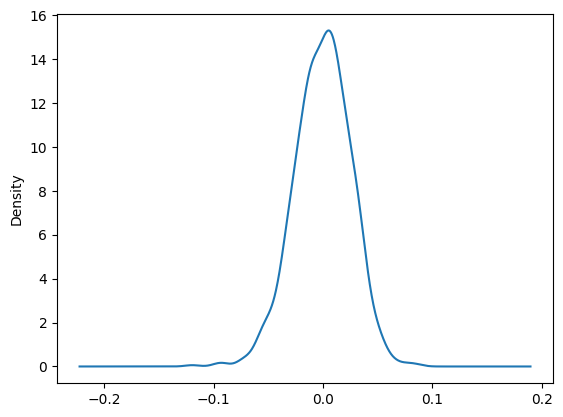

In [59]:
samples = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[0]]['Close']

samples.plot.kde()

<Axes: ylabel='Density'>

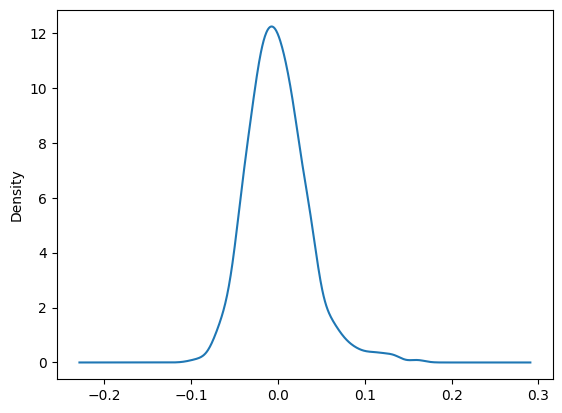

In [60]:
samples = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[1]]['Close']

samples.plot.kde()

<Axes: ylabel='Density'>

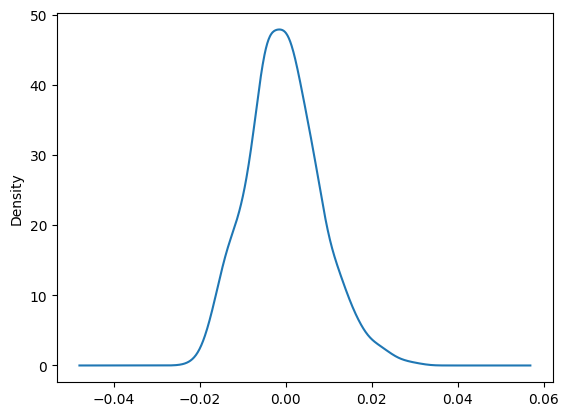

In [61]:
samples = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[2]]['Close']

samples.plot.kde()

In [66]:
f_1 = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[0]]['Close']
f_2 = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[1]]['Close']
f_3 = factors_returns.loc[factors_returns.Symbol == factors_returns.Symbol.unique()[2]]['Close']

min_ = min(len(f_1), len(f_2), len(f_3))

pd.DataFrame({
    'f1': list(f_1)[:min_],
    'f2': list(f_2)[:min_],
    'f3': list(f_3)[:min_]
}).corr()

,f1,f2,f3
f1,1.000000,0.074578,0.530550
f2,0.074578,1.000000,0.206538
f3,0.530550,0.206538,1.000000


In [67]:
factors_returns_cov = pd.DataFrame({
    'f1': list(f_1)[:min_],
    'f2': list(f_2)[:min_],
    'f3': list(f_3)[:min_]
}).cov().to_numpy()

factors_returns_mean = pd.DataFrame({
    'f1': list(f_1)[:min_],
    'f2': list(f_2)[:min_],
    'f3': list(f_3)[:min_]
}).mean()

In [68]:
from numpy.random import multivariate_normal

multivariate_normal(factors_returns_mean, factors_returns_cov)

array([ 0.03801206, -0.04189962, -0.00038571])

In [73]:
b_coefs_per_stock = spark.sparkContext.broadcast(coefs_per_stock)
b_feature_columns = spark.sparkContext.broadcast(feature_columns)
b_factors_returns_mean = spark.sparkContext.broadcast(factors_returns_mean)
b_factors_returns_cov = spark.sparkContext.broadcast(factors_returns_cov)

In [74]:
from pyspark.sql.types import IntegerType

parallelism = 1000
num_trials = 10000
base_seed = 1496

seeds = [b for b in range(base_seed, base_seed + parallelism)]

seedsDF = spark.createDataFrame(seeds, IntegerType())
seedsDF = seedsDF.repartition(parallelism)

In [75]:
import random
from numpy.random import seed
from pyspark.sql.types import LongType, ArrayType, DoubleType
from pyspark.sql.functions import udf

def calculate_trial_return(x):
  trial_return_list = []

  for i in range(int(num_trials/parallelism)):
    random_int = random.randint(0, num_trials*num_trials)
    seed(x)
    random_factors = multivariate_normal(b_factors_returns_mean.value, b_factors_returns_cov.value)
    coefs_per_stock_df = b_coefs_per_stock.value
    returns_per_stock = (coefs_per_stock_df[b_feature_columns.value] *
      (list(random_factors) + list(random_factors**2)))
    trial_return_list.append(float(returns_per_stock.sum(axis=1).sum(), b_coefs_per_stock.value.size))

  return trial_return_list

udf_return = udf(calculate_trial_return, ArrayType(DoubleType()))

In [76]:
from pyspark.sql.functions import col, explode

trials = seedsDF.withColumn("trial_return", udf_return(col("value")))
trials = trials.select('value', explode('trial_return').alias('trial_return'))

trials = trials.cache()

In [ ]:
trials.show()

In [77]:
trials.approxQuantile('trial_return', [0.5], 0.0)

trials.orderBy(col('trial_return').asc()).\
  limit(int(trials.count()/20)).\
  agg(f.avg(col("trial_return"))).show()

PythonException: 
  An exception was thrown from the Python worker. Please see the stack trace below.
Traceback (most recent call last):
  File "<ipython-input-75-458ee84eb751>", line 16, in calculate_trial_return
TypeError: float expected at most 1 argument, got 2


In [ ]:
mytrials=trials.toPandas()
mytrials.plot.line()